<a href="https://colab.research.google.com/github/AliceInHunterland/2019_IT/blob/master/MelGAN_STFT_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install

In [ ]:
import os
!git clone https://github.com/TensorSpeech/TensorFlowTTS
os.chdir("TensorFlowTTS")
!pip install  .
os.chdir("..")
import sys
sys.path.append("TensorFlowTTS/")

Cloning into 'TensorFlowTTS'...
remote: Enumerating objects: 4941, done.
remote: Counting objects: 100% (4941/4941), done.
remote: Compressing objects: 100% (3270/3270), done.
remote: Total 10207 (delta 1490), reused 4901 (delta 1477), pack-reused 5266
Receiving objects: 100% (10207/10207), 110.47 MiB | 29.16 MiB/s, done.
Resolving deltas: 100% (4875/4875), done.
Processing /content/TensorFlowTTS
     |████████████████████████████████| 320.4MB 50kB/s 
     |████████████████████████████████| 706kB 40.2MB/s 
     |████████████████████████████████| 184kB 53.0MB/s 
     |████████████████████████████████| 245kB 50.4MB/s 
     |████████████████████████████████| 225kB 54.0MB/s 
     |████████████████████████████████| 1.3MB 49.4MB/s 
     |████████████████████████████████| 1.7MB 40.6MB/s 
     |████████████████████████████████| 3.1MB 44.7MB/s 
  Cloning https://github.com/repodiac/german_transliterate.git to /tmp/pip-install-39lhuk4_/german-transliterate
  Running command git clone -q https://

## Download pretrained feature generation model

You can select one from two models. Please only run the seletected model cells.


### (a) Tacotron-2

In [ ]:
print("Downloading Tacotron2 model...")
!gdown --id {"12jvEO1VqFo1ocrgY9GUHF_kVcLn3QaGW"} -O tacotron2-120k.h5
!gdown --id {"1OI86hkN1YCpHBsIKnkELNbSho5Pj-pPY"} -O tacotron2_config.yml

Downloading...
From: https://drive.google.com/uc?id=12jvEO1VqFo1ocrgY9GUHF_kVcLn3QaGW
To: /content/tacotron2-120k.h5
128MB [00:00, 132MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1OI86hkN1YCpHBsIKnkELNbSho5Pj-pPY
To: /content/tacotron2_config.yml
100% 1.49k/1.49k [00:00<00:00, 1.29MB/s]


### (b) FastSpeech

In [ ]:
print("Downloading FastSpeech model...")
!gdown --id {"1T5GOE_M27zJlCAjnanpOS9HBPUcdE9sB"} -O fastspeech-150k.h5
!gdown --id {"1TnkL2-rIZ6N-n4z4oHp3X2wIpxiFwu2H"} -O fastspeech_config.yml

Downloading...
From: https://drive.google.com/uc?id=1T5GOE_M27zJlCAjnanpOS9HBPUcdE9sB
To: /content/fastspeech-150k.h5
121MB [00:01, 91.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TnkL2-rIZ6N-n4z4oHp3X2wIpxiFwu2H
To: /content/fastspeech_config.yml
100% 1.51k/1.51k [00:00<00:00, 5.67MB/s]


### (c) FastSpeech2

In [ ]:
print("Downloading FastSpeech2 model...")
!gdown --id {"1EhMD20uAFlKsii1lMnlkrsenVTFKM0ld"} -O fastspeech2-150k.h5
!gdown --id {"1wnbIgjTI2iUsCyVJ37ar9CS8-aEjVEee"} -O fastspeech2_config.yml

Downloading...
From: https://drive.google.com/uc?id=1EhMD20uAFlKsii1lMnlkrsenVTFKM0ld
To: /content/fastspeech2-150k.h5
125MB [00:00, 144MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wnbIgjTI2iUsCyVJ37ar9CS8-aEjVEee
To: /content/fastspeech2_config.yml
100% 1.67k/1.67k [00:00<00:00, 1.15MB/s]


## Download pretrained Vocoder MelGAN + STFT Loss


In [ ]:
print("Downloading MelGAN-STFT model...")
!gdown --id {"1WB5iQbk9qB-Y-wO8BU6S2TnRiu4VU5ys"} -O melgan.stft-2M.h5
!gdown --id {"1OqdrcHJvtXwNasEZP7KXZwtGUDXMKNkg"} -O melgan.stft_config.yml

Downloading...
From: https://drive.google.com/uc?id=1WB5iQbk9qB-Y-wO8BU6S2TnRiu4VU5ys
To: /content/melgan.stft-2M.h5
17.1MB [00:00, 79.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OqdrcHJvtXwNasEZP7KXZwtGUDXMKNkg
To: /content/melgan.stft_config.yml
100% 1.77k/1.77k [00:00<00:00, 1.15MB/s]


## Load Model

In [ ]:
import tensorflow as tf

import yaml
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd

from tensorflow_tts.inference import TFAutoModel
from tensorflow_tts.inference import AutoConfig
from tensorflow_tts.inference import AutoProcessor

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


### (a) Tacotron 2

In [ ]:
tacotron2_config = AutoConfig.from_pretrained('TensorFlowTTS/examples/tacotron2/conf/tacotron2.v1.yaml')
tacotron2 = TFAutoModel.from_pretrained(
    config=tacotron2_config,
    pretrained_path="tacotron2-120k.h5",
    name="tacotron2"
)

### (b) FastSpeech

In [ ]:
fastspeech_config = AutoConfig.from_pretrained('TensorFlowTTS/examples/fastspeech/conf/fastspeech.v1.yaml')
fastspeech = TFAutoModel.from_pretrained(
    config=fastspeech_config,
    pretrained_path="fastspeech-150k.h5",
    name="fastspeech"
)

### (c) FastSpeech2

In [ ]:
fastspeech2_config = AutoConfig.from_pretrained('TensorFlowTTS/examples/fastspeech2/conf/fastspeech2.v1.yaml')
fastspeech2 = TFAutoModel.from_pretrained(
    config=fastspeech2_config,
    pretrained_path="fastspeech2-150k.h5",
    name="fastspeech2"
)

### MelGAN STFT

In [ ]:
melgan_stft_config = AutoConfig.from_pretrained('TensorFlowTTS/examples/melgan_stft/conf/melgan_stft.v1.yaml')
melgan_stft = TFAutoModel.from_pretrained(
    config=melgan_stft_config,
    pretrained_path="melgan.stft-2M.h5",
    name="melgan_stft"
)

## Inference
- The first time model run inference will very slow cause by @tf.function.

In [ ]:
print("Downloading ljspeech_mapper.json ...")
!gdown --id {"1YBaDdMlhTXxsKrH7mZwDu-2aODq5fr5e"} -O ljspeech_mapper.json

Downloading...
From: https://drive.google.com/uc?id=1YBaDdMlhTXxsKrH7mZwDu-2aODq5fr5e
To: /content/ljspeech_mapper.json
100% 3.57k/3.57k [00:00<00:00, 5.65MB/s]


In [ ]:
processor = AutoProcessor.from_pretrained(pretrained_path="./ljspeech_mapper.json")

In [ ]:
def do_synthesis(input_text, text2mel_model, vocoder_model, text2mel_name, vocoder_name):
  input_ids = processor.text_to_sequence(input_text)

  # text2mel part
  if text2mel_name == "TACOTRON":
    _, mel_outputs, stop_token_prediction, alignment_history = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        tf.convert_to_tensor([len(input_ids)], tf.int32),
        tf.convert_to_tensor([0], dtype=tf.int32)
    )
  elif text2mel_name == "FASTSPEECH":
    mel_before, mel_outputs, duration_outputs = text2mel_model.inference(
        input_ids=tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
        speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    )
  elif text2mel_name == "FASTSPEECH2":
    mel_before, mel_outputs, duration_outputs, _, _ = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
        speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        f0_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        energy_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    )
  else:
    raise ValueError("Only TACOTRON, FASTSPEECH, FASTSPEECH2 are supported on text2mel_name")

  # vocoder part
  if vocoder_name == "MELGAN" or vocoder_name == "MELGAN-STFT":
    audio = vocoder_model(mel_outputs)[0, :, 0]
  elif vocoder_name == "MB-MELGAN":
    audio = vocoder_model(mel_outputs)[0, :, 0]
  else:
    raise ValueError("Only MELGAN, MELGAN-STFT and MB_MELGAN are supported on vocoder_name")

  if text2mel_name == "TACOTRON":
    return mel_outputs.numpy(), alignment_history.numpy(), audio.numpy()
  else:
    return mel_outputs.numpy(), audio.numpy()

def visualize_attention(alignment_history):
  import matplotlib.pyplot as plt

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)
  ax.set_title(f'Alignment steps')
  im = ax.imshow(
      alignment_history,
      aspect='auto',
      origin='lower',
      interpolation='none')
  fig.colorbar(im, ax=ax)
  xlabel = 'Decoder timestep'
  plt.xlabel(xlabel)
  plt.ylabel('Encoder timestep')
  plt.tight_layout()
  plt.show()
  plt.close()

def visualize_mel_spectrogram(mels):
  mels = tf.reshape(mels, [-1, 80]).numpy()
  fig = plt.figure(figsize=(10, 8))
  ax1 = fig.add_subplot(311)
  ax1.set_title(f'Predicted Mel-after-Spectrogram')
  im = ax1.imshow(np.rot90(mels), aspect='auto', interpolation='none')
  fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
  plt.show()
  plt.close()

### Speech Example

In [ ]:
input_text = "Hello, it's me. I was wondering if after all these years you'd like to meet to go over everything. They say that time's supposed to heal ya But I ain't done much healing"


In [ ]:
# setup window for tacotron2 if you want to try
tacotron2.setup_window(win_front=10, win_back=10)

### (a) Tacotron2 + MELGAN-STFT

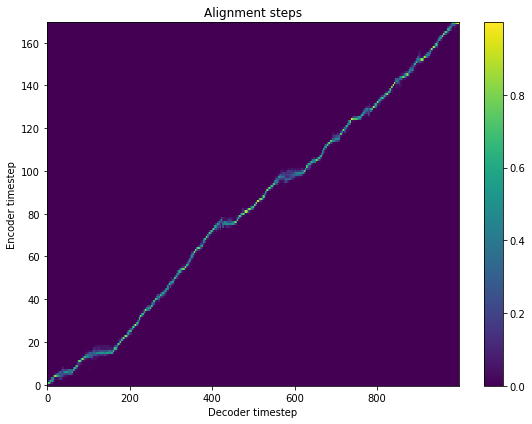

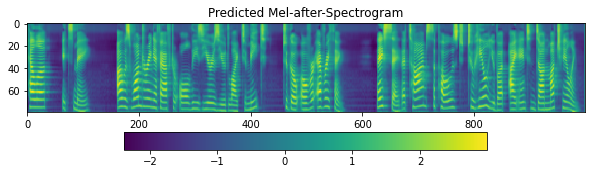

In [ ]:
feature_gen_model = "TACOTRON" # или "FASTSPEECH" или "FASTSPEECH2"
mels, alignment_history, audios = do_synthesis(input_text, tacotron2, melgan_stft, feature_gen_model, "MELGAN-STFT")
visualize_attention(alignment_history[0])
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)